In [105]:
import metrica.Metrica_IO as mio
import metrica.Metrica_Viz as mviz

import math
import pandas as pd
import numpy as np

In [106]:
DATADIR = '../data'
game_id = 2 # let's look at sample match 2

In [107]:
events = mio.read_event_data(DATADIR,game_id)
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [108]:
events['Type'].value_counts()

Type
PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: count, dtype: int64

In [109]:
events = mio.to_metric_coordinates(events)
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [110]:
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

In [111]:
home_events['Type'].value_counts()

Type
PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: count, dtype: int64

In [112]:
away_events['Type'].value_counts()

Type
PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: count, dtype: int64

In [113]:
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [114]:
home_shots['Subtype'].value_counts()

Subtype
ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: count, dtype: int64

In [115]:
away_shots['Subtype'].value_counts()

Subtype
OFF TARGET-OUT         3
BLOCKED                2
ON TARGET-GOAL         2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: count, dtype: int64

In [116]:
home_shots['From'].value_counts() 

From
Player9     4
Player10    3
Player5     2
Player3     1
Player4     1
Player7     1
Player12    1
Name: count, dtype: int64

In [117]:
all_goals = shots[shots['Subtype'].str.contains('-GOAL')]
all_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [118]:
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')]
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [119]:
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')]
away_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72


Text(-47.7, -3.400000000000003, '')

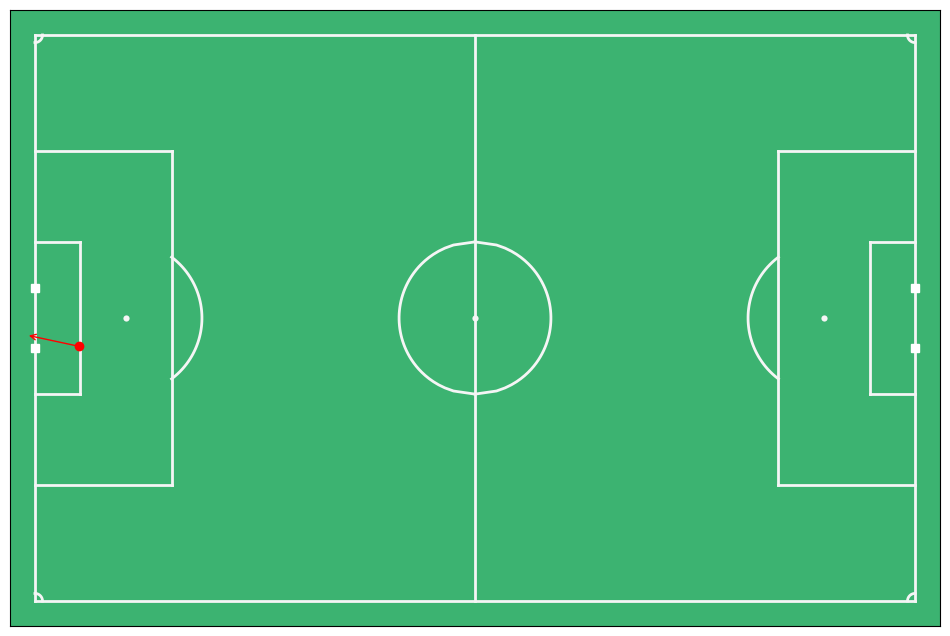

In [120]:
# Period 1 Home Goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

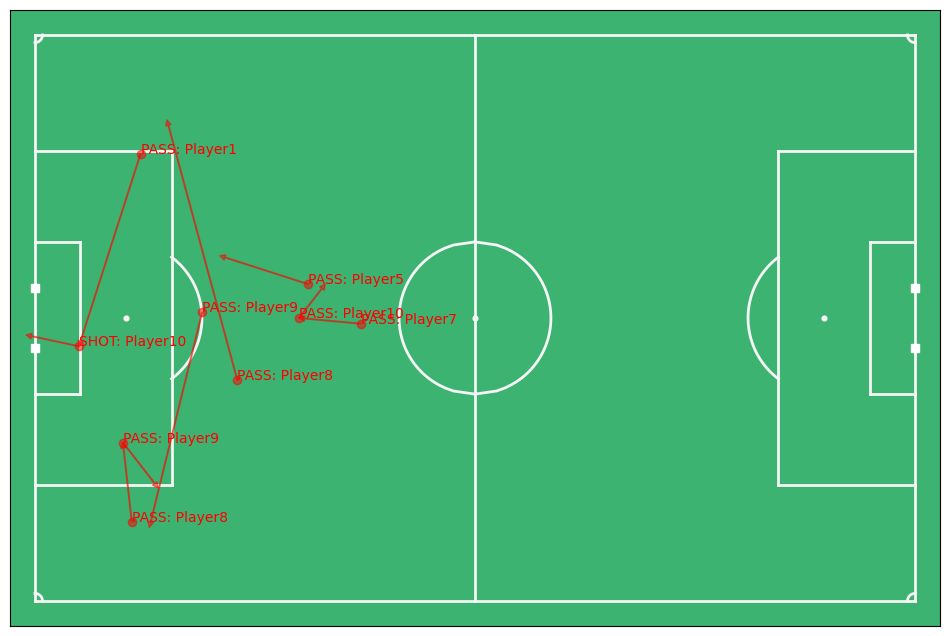

In [121]:
mviz.plot_events( events.loc[190:198], indicators = ['Marker','Arrow'], annotate=True )

In [122]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [123]:
tracking_home.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

In [124]:
tracking_away.columns

Index(['Period', 'Time [s]', 'Away_25_x', 'Away_25_y', 'Away_15_x',
       'Away_15_y', 'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y',
       'Away_18_x', 'Away_18_y', 'Away_19_x', 'Away_19_y', 'Away_20_x',
       'Away_20_y', 'Away_21_x', 'Away_21_y', 'Away_22_x', 'Away_22_y',
       'Away_23_x', 'Away_23_y', 'Away_24_x', 'Away_24_y', 'Away_26_x',
       'Away_26_y', 'ball_x', 'ball_y'],
      dtype='object')

In [125]:
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

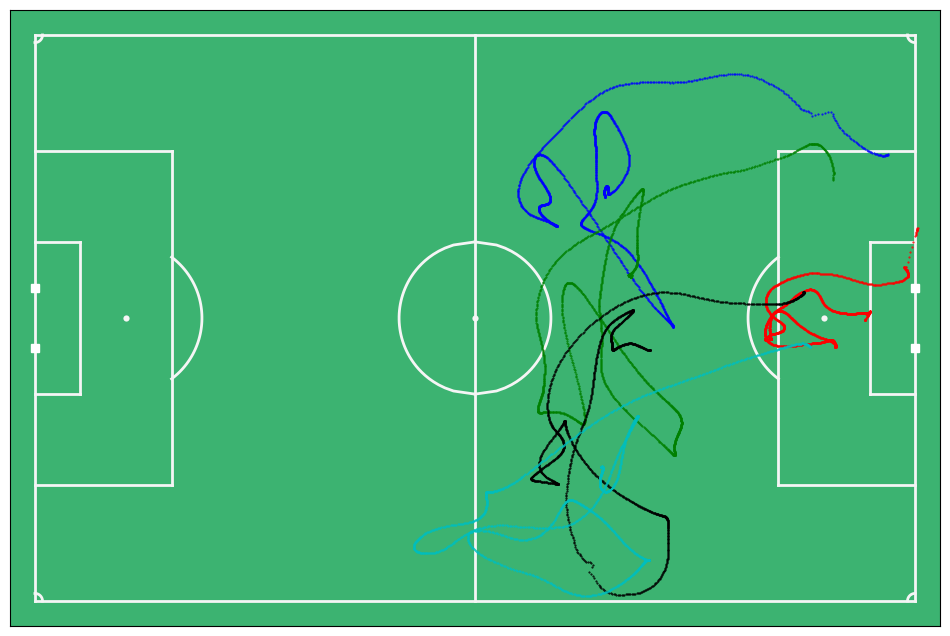

In [126]:
fig, ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', markersize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', markersize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', markersize=1)

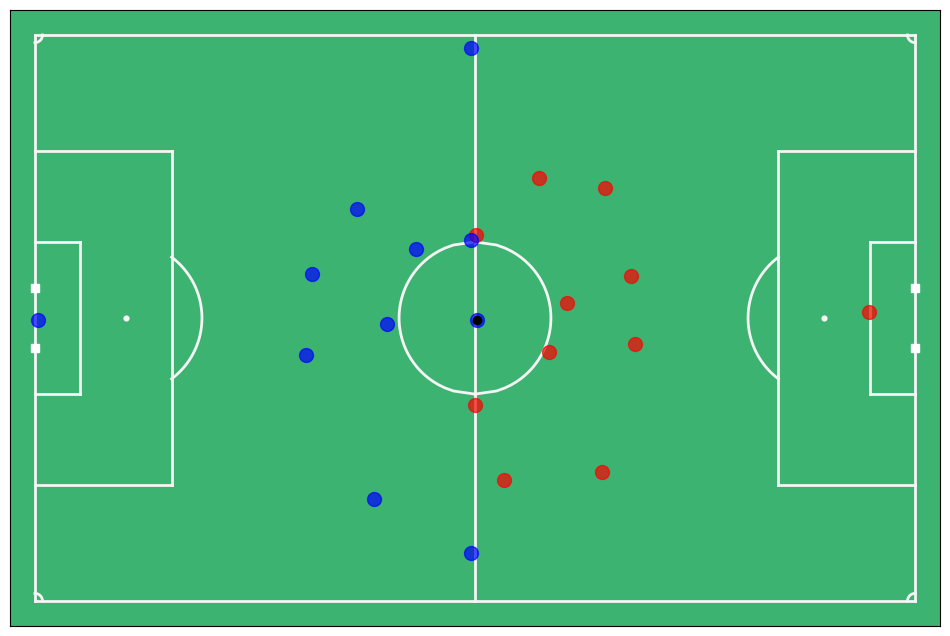

In [127]:
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

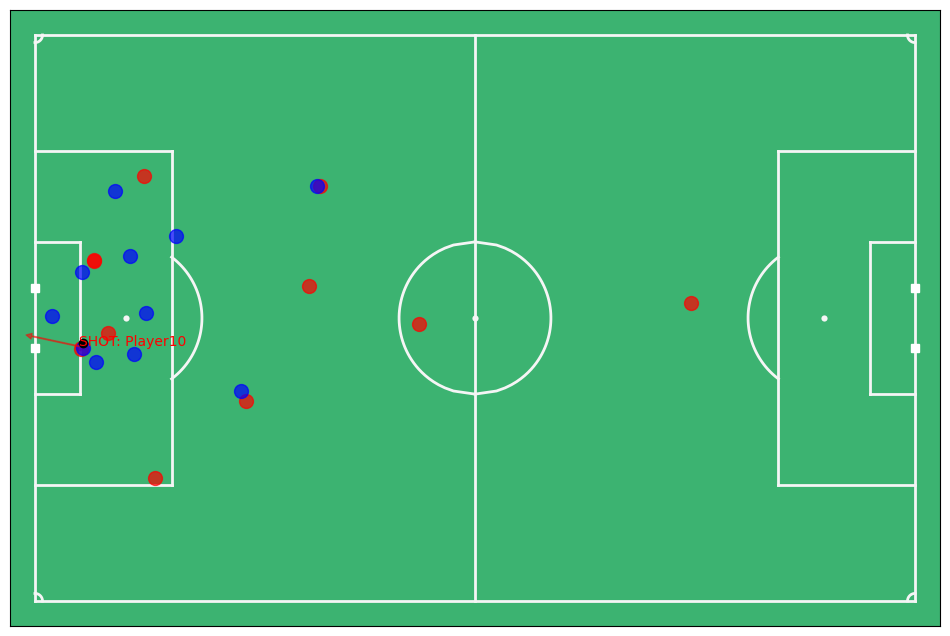

In [128]:
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

In [129]:
# Homework
# 1. Plot the passes and shot leading up to the second and third goals in the match
# 2. Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals
# 3. Plot the positions of all the players at Player 9's goal (# Period 2 Home Goal)
# 4. Calculate how far each player ran

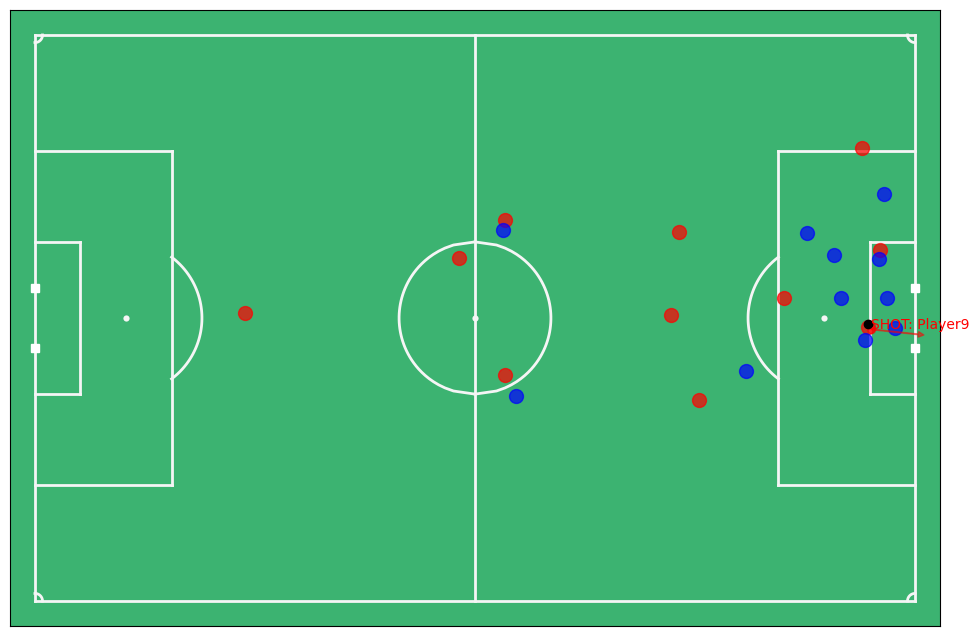

In [130]:
# Period 2 Home Goal
fig,ax = mviz.plot_events( events.loc[1118:1118], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1118]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

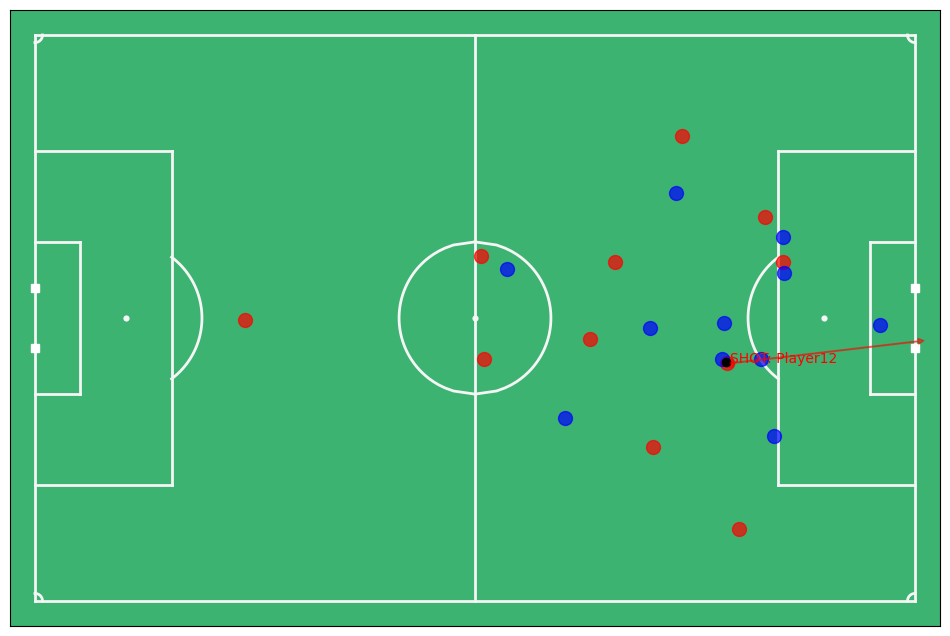

In [131]:
# Period 2 Home Goal
fig,ax = mviz.plot_events( events.loc[1723:1723], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1723]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

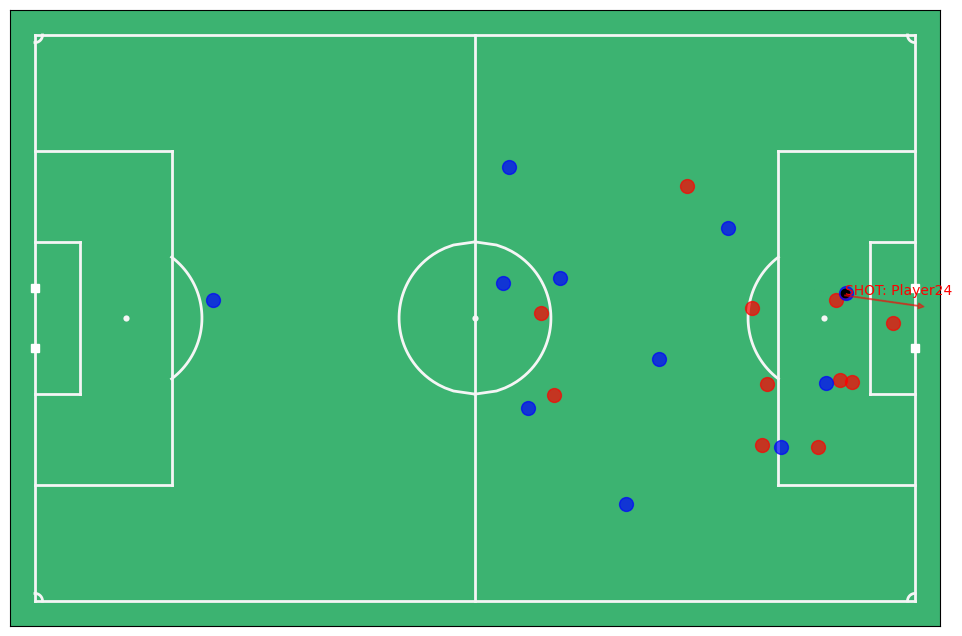

In [132]:
# Period 1 Away Goal
fig,ax = mviz.plot_events( events.loc[823:823], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[823]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

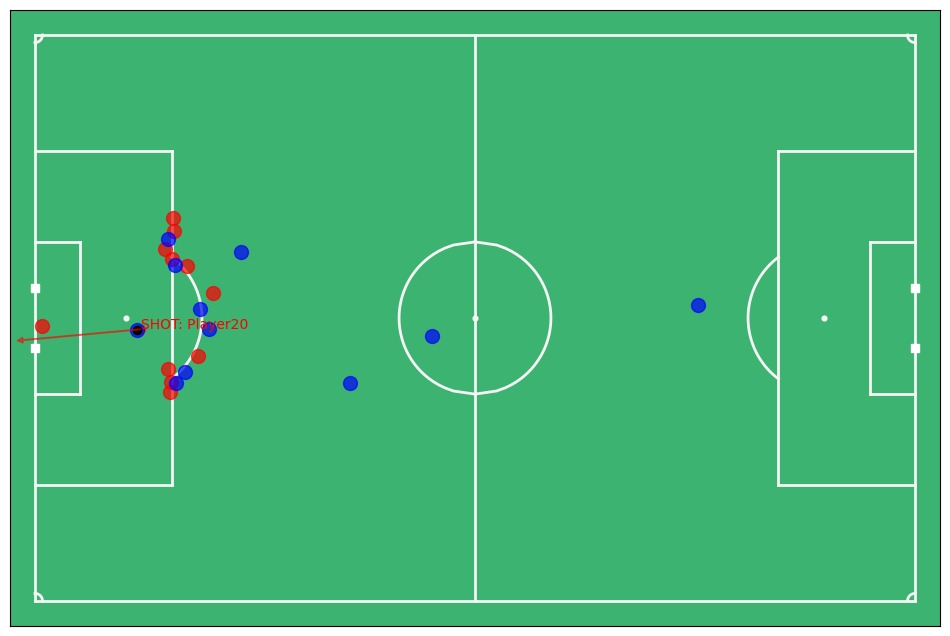

In [133]:
# Period 2 Away Goal
# (Penalty)
fig,ax = mviz.plot_events( events.loc[1671:1671], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1671]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

In [134]:
player9_shots = shots[shots['From']=='Player9']
player9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


In [135]:
player9_other_shots = player9_shots[~player9_shots['Subtype'].str.contains('-GOAL')]
player9_other_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


In [136]:
player9_goal = player9_shots[player9_shots['Subtype'].str.contains('-GOAL')]
player9_goal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.7,-1.36,54.06,-2.04


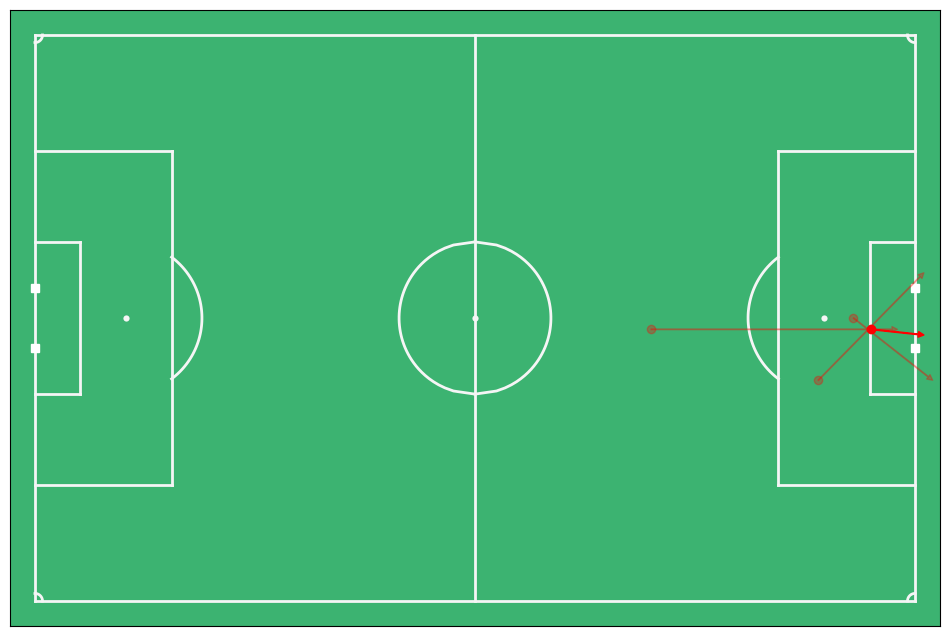

In [137]:
# 2. Shots by Player 9 of the home team, different symbol and transparency (alpha) for shots that resulted in goals
fig,ax = mviz.plot_events( player9_other_shots, indicators = ['Marker','Arrow'], alpha=0.3 )
fig,ax = mviz.plot_events( player9_goal, figax=(fig,ax), indicators = ['Marker','Arrow'], alpha=1 )

In [138]:
# 4. Calculate how far each player ran
# players 1 - 14, ex: Home_11_x', 'Home_11_y
# players 15 - 26, ex: Away_15_x, Away_15_y
# positions = tracking_home.loc[7000:7010, ['Home_4_x', 'Home_4_y']]
# positions
# positions.to_clipboard(sep=',')

In [139]:
# Home player distances
player_distances = {}

for i in range(1, 15):
    player_x_col = f'Home_{i}_x'
    player_y_col = f'Home_{i}_y'
    
    total_distance = 0
    
    # Loop through each time step
    for j in range(1, len(tracking_home)):
        # Calculate Euclidean distance between consecutive positions
        x1 = tracking_home[player_x_col].iloc[j-1]
        y1 = tracking_home[player_y_col].iloc[j-1]
        x2 = tracking_home[player_x_col].iloc[j]
        y2 = tracking_home[player_y_col].iloc[j]
        
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

        # print('distance', distance)

        if not math.isnan(distance):
            total_distance += distance
    
    # print(f'distance player {i}: ', total_distance)

    player_distances[f'Player{i}'] = total_distance
distances_df = pd.DataFrame(player_distances.items(), columns=['Player', 'Total Distance'])

distances_df

,Player,Total Distance
0,Player1,10435.910546
1,Player2,9991.684623
2,Player3,9631.355462
3,Player4,7321.092038
4,Player5,12242.253654
5,Player6,11608.051710
6,Player7,11298.449736
7,Player8,9113.617593
8,Player9,9856.172043
9,Player10,9098.232198


In [140]:
# Away player distances
player_distances = {}

for i in range(15, 27):
    player_x_col = f'Away_{i}_x'
    player_y_col = f'Away_{i}_y'
    
    total_distance = 0
    
    # Loop through each time step
    for j in range(1, len(tracking_away)):
        # Calculate Euclidean distance between consecutive positions
        x1 = tracking_away[player_x_col].iloc[j-1]
        y1 = tracking_away[player_y_col].iloc[j-1]
        x2 = tracking_away[player_x_col].iloc[j]
        y2 = tracking_away[player_y_col].iloc[j]
        
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

        # print('distance', distance)

        if not math.isnan(distance):
            total_distance += distance
    
    # print(f'distance player {i}: ', total_distance)

    player_distances[f'Player{i}'] = total_distance
distances_df = pd.DataFrame(player_distances.items(), columns=['Player', 'Total Distance'])

distances_df

,Player,Total Distance
0,Player15,10330.623129
1,Player16,9601.728664
2,Player17,9406.651122
3,Player18,10468.633633
4,Player19,11245.079019
5,Player20,10981.186328
6,Player21,10073.053749
7,Player22,6419.742064
8,Player23,9736.236143
9,Player24,9967.092460
